# Misspelled Words #

Hypothesis: “The meaning of comments containing multiple misspelled words are harder to understand”

Reason: “Because online comments often do not basically follow formal language conventions, there are many unstructured, informal and often misspelled and abbreviations. These make the abusive detection very difficult.“ (Detecting context abusiveness using hierarchical deep learning, Lee et al. 2019)

Source: pyspellchecker Library (https://github.com/barrust/pyspellchecker)

#### Example ####

ID: 476
Label: True
Prediction: False
Confidence: 0.8058809
Comment: Schon viele Artikel ueber fluechtlinge gelesen und so manches mal wusste ich nicht ob ich lachen oder weinen sollte abe r dieser Artikel uebertrifft alles ....Armutszeugnis fuer den deutschen Journalismus .

In [10]:
%run ../config.ipynb
# contains a function for loading the predictions
# and generating the dictionaries
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
# function for showing diagram
%run ../lib/diagram_generator.ipynb
# function for showing metrics
%run ../lib/metrics_generator.ipynb
# function for showing data table
%run ../lib/table_generator.ipynb

# the second parameter of load_data desides if you want to generate dictionaries
# you can find the dicts inside the data_loader file
data = load_data('../data/predictions.json')

##### Create Filters #####

In [4]:
# create spellchecker
from spellchecker import SpellChecker
spellChecker = SpellChecker(language=u'de', case_sensitive=True)

# filter that passes everything
def all(c):
    return True

# returns the number of errors
def get_errors(tokens):
    return len(spellChecker.unknown(tokens.text))

# this function generates a filter based on
# the i value that defines the number of tokens
# wich should be false
def generate_filter(i):
    def f(element):
        ld = get_errors(element['tokens'])
        if ld == i:
            return True
        return False
    return f


##### Creates diagram from array of filters #####

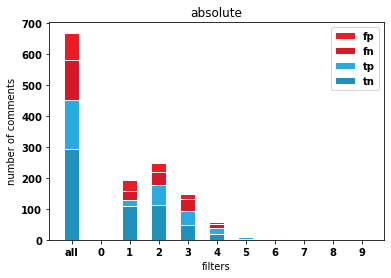

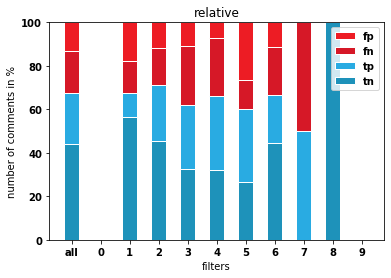

In [5]:
diagram_filters = []
diagram_filters.append(('all', all))

start = 0
stop = 10
step = 1
for i in range(start, stop, step):
    diagram_filters.append(('%s' % (i),generate_filter(i)))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

##### Calculating metrics for different filters #####

In [11]:
print('All')
show_metrics(calc_metrics())

print('number of misspelled words: 3')
show_metrics(calc_metrics(diagram_filters[4][1]))

# shows the difference between the the metric of all predictions
# and the metric for a single filter
print('number of misspelled words: 3 difference')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[4][1])))

All


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


number of misspelled words: 3


,label hate (84),label nohate (64)
pred hate (60),44,16
pred nohate (88),40,48


accuracy,precision,recall,f1_score
0.6216216216216216,0.7333333333333333,0.5238095238095238,0.611111111111111


number of misspelled words: 3 difference


,label hate (287),label nohate (383)
pred hate (269),197,72
pred nohate (401),90,311


accuracy,precision,recall,f1_score
0.7582089552238805,0.7323420074349443,0.686411149825784,0.7086330935251799
